# **Regresiones y sus Algoritmos en Python y R**

# **CONTENIDOS**

1. Relaciones entre variables
2. Correlación Lineal
3. Regresión lineal simple
4. Algoritmos de Regresión más comunes

    4.1. Regresión Lineal Simple

    4.2. Regresión Lineal Múltiple

    4.3. Método de Modelación con Eliminación hacia atras con R
    
    4.4. Regresión Polinomial

    4.5. Regresión Logística

    4.6. Regresión Robusta: : todo lo que necesita saber y un ejemplo en Python

    4.7. Regresión Robusta con Statsmodels

    4.8. Regresión lineal con statsmodels y sus Diagnósticos

# **INTRODUCCIÓN GENERAL**

1. [Modelos para entender una realidad caótica](https://youtube.com/watch?v=Sb8XVheowVQ&si=PB_Wfgj3V_b8H3T7)

2. [Regresión Lineal y Mínimos Cuadrados](https://youtu.be/k964_uNn3l0?si=-dSIGBELI0iTvmz5)

# **1. Relaciones entre variables**

El concepto de una relación entre dos variables, como entre el ingreso y los gastos para la vivienda; o la Temperatura ambiente y la presión de vapor, es familiar.

Se distingue entre:
* **Una relación funcional**.
* **Una relación estadística**

**Principales modelos estadísticos según la naturaleza de las variables**:

|Variable respuesta|Variables independientes|
|------------------|------------------------|
|Continua|Todas son continuas: regresión normal|
|Continua|Todas son categóricas: análisis de la varianza|
|Continua|Ambos tipos: análisis de la covarianza|
|Proporción| Regresión logística|
|Conteo|Modelos log-lineales|
|Binarias|Regresión logística binaria|
| Tiempo de muerte| Análisis de supervivencia|

#### **1.1. Relación funcional entre dos variables**

Una relación funcional entre dos variables se expresa mediante una fórmula matemática. Si X denota la variable independiente e Y la variable dependiente, una relación funcional tiene la forma:
$$Y = f(X)$$
Dado un valor particular de X, la función $f$ indica el valor correspondiente de Y.

**Ejemplo**: Considere la relación entre las ventas en dólares (Y) de un producto vendido a un precio fijo y el número de unidades vendidas (X). Si el precio de venta es de 2 pesos por unidad, la relación se expresa mediante la ecuación:
$$Y = 2*X$$

In [ ]:
# Utilizamos R Magit para lanzar órdenes de R en Python
%load_ext rpy2.ipython

In [ ]:
%%R
X = c(75,25,130)    # Se crean los elementos de la lista, utilizando la función
                    # c() de R, la cual crea un vector de datos separados por comas.
Y = 2 * X           # Se crea la variable Y como función de X
plot(X,Y,type = "line")     # Se grafica el par X,Y, como un gráfico de tipo linea

Esta relación funcional se muestra en la Figura. El número de unidades vendidas y las ventas en dólares durante tres períodos recientes (mientras que el precio unitario se mantuvo constante en 2).

Estas observaciones se trazan también en la Figura. Tenga en cuenta que todos caen directamente en la línea de **relación funcional**. Esto es característico de todas las relaciones funcionales.

#### **1.2. Relación estadística entre dos variables**

Una **relación estadística**, a diferencia de una **relación funcional**, no es perfecta. En general, las observaciones para una relación estadística no se encuentran directamente en la curva de relación.

**Ejemplo**: Se obtuvieron evaluaciones de desempeño para 10 empleados a mediados de año y al final del año. Estos datos se trazan en la figura. Las evaluaciones de fin de año se toman como la variable dependiente o de respuesta Y, y las evaluaciones de mitad de año como la variable independiente, explicativa o predictiva X. El trazado se realiza como antes. Por ejemplo, las evaluaciones de desempeño de mitad de año y fin de año para un empleado se trazan en X = 90, Y = 94.

In [ ]:
%%R
# Se crean dos vectores X,Y y se grafica la nube de puntos con la función plot()
X = c(60, 68, 76, 80, 80, 82, 86, 90, 92, 98)
Y = c(60, 70, 72, 76, 80, 85, 85, 94, 93, 92)

In [ ]:
%%R
# Se grafica la nube de puntos con la función plot(X,Y)
plot(X,Y)
# Luego se realiza una regresión lineal con lm(formula = Y~X) y se
# Agrega la recta de esa regresión al gráfico anterior con la función: abline()
abline(lm(formula = Y~X))
# Este tema desarrollará más adelante

La segunda figura sugiere claramente que existe una relación entre las evaluaciones de mitad de año y de fin de año, en el sentido de que cuanto mayor sea la evaluación de mitad de año, mayor será la evaluación de fin de año. Sin embargo, la relación no es perfecta. Hay una dispersión de puntos, lo que sugiere que parte de la variación en las evaluaciones de fin de año no se explica por las evaluaciones de desempeño de mitad de año. Por ejemplo, dos empleados tuvieron evaluaciones de mitad de año de X = 80, pero recibieron evaluaciones de fin de año algo diferentes. Debido a la dispersión de puntos en una relación estadística, la primera Figura se llama **diagrama de dispersión** o **gráfico de dispersión**. En terminología estadística, cada punto en el diagrama de dispersión representa un ensayo o un caso.

En la segunda Figura, hemos trazado una línea que describe la relación estadística entre las evaluaciones de mitad de año y de fin de año. Indica la tendencia general por la cual las evaluaciones de fin de año varían con el nivel de evaluación de desempeño de mitad de año. Tenga en cuenta que la mayoría de los puntos no se encuentran directamente en la línea de la **relación estadística**. Esta dispersión de puntos alrededor de la línea representa una variación en las evaluaciones de fin de año que no está asociada con la evaluación de desempeño de mitad de año y que generalmente se considera de naturaleza aleatoria. Las relaciones estadísticas pueden ser muy útiles, aunque no tengan la exactitud de una relación funcional.

# **2. Correlación Lineal**

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la **covarianza**, que indica el grado de variación conjunta de dos variables aleatorias.

$$
Covarianza \space Muestral = Cov(X,Y) = \frac{\sum_{i=1}^n((x_i-\bar{x})(y_i-\bar{y}))}{N-1}
$$

siendo $\bar{x}$ e $\bar{y}$ la media de cada variable y $x_i$ e $y_i$ i el valor de las variables para la observación i.

La **covarianza** depende de las escalas en que se miden las variables estudiadas, por lo tanto, no es comparable entre distintos pares de variables. Para poder hacer comparaciones se estandariza la covarianza, generando lo que se conoce como **coeficientes de correlación**. Existen diferentes tipos, de entre los que destacan el **coeficiente de Pearson**, **Rho de Spearman** y **Tau de Kendall**.

+ Todos ellos varían entre +1 y -1. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.
+ Se emplean como medida de fuerza de asociación (tamaño del efecto):
    - 0: asociación nula.
    - 0.1: asociación pequeña.
    - 0.3: asociación mediana.
    - 0.5: asociación moderada.
    - 0.7: asociación alta.
    - 0.9: asociación muy alta.


**Las principales diferencias entre estos tres coeficientes de asociación son:**

1. La **correlación de Pearson** funciona bien con **variables cuantitativas que tienen una distribución normal**. En el libro Handbook of Biological Statatistics se menciona que sigue siendo bastante robusto a pesar de la falta de normalidad. Es más sensible a los valores extremos que las otras dos alternativas.
2. La **correlación de Spearman** se emplea cuando los datos son ordinales, de intervalo, o bien **cuando no se satisface la condición de normalidad** para variables continuas y los datos se pueden transformar a rangos. Es un método no paramétrico.
3. La **correlación de Kendall** es otra alternativa **no paramétrica** para el estudio de la correlación que trabaja con rangos. **Se emplea cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango**, es decir, cuando hay muchas ligaduras.

Además del valor obtenido para el coeficiente de correlación, **es necesario calcular su significancia**. Esto se hace mediante una prueba o [contraste de hipótesis](https://es.wikipedia.org/wiki/Contraste_de_hip%C3%B3tesis) la cual calcula un valor de P, llamado **p-value**. Solo si el p-value es significativo se puede aceptar que existe correlación, y esta será de la magnitud que indique el coeficiente. Por muy cercano que sea el valor del coeficiente de correlación a +1 o −1, si no es significativo, se ha de interpretar que la correlación de ambas variables es 0, ya que el valor observado puede deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el [t-test](https://es.wikipedia.org/wiki/Prueba_t_de_Student)

[Distribución t de Student](https://es.m.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student#)

Al igual que ocurre siempre que se trabaja con muestras, por un lado está el parámetro estimado (en este caso el coeficiente de correlación) y por otro su significancia a la hora de considerar la población entera. Si se calcula el coeficiente de correlación entre X e Y en diferentes muestras de una misma población, el valor va a variar dependiendo de las muestras utilizadas. Por esta razón se tiene que calcular la significancia de la correlación obtenida y su intervalo de confianza.

$$
t = \frac{r\sqrt{N-2}}{\sqrt{1-r^2}}, df=N-2
$$

Para este test de hipótesis, H0 considera que las variables son independientes (coeficiente de correlación poblacional = 0) mientras que, la Ha , considera que existe relación (coeficiente de correlación poblacional ≠ 0)

La correlación lineal entre dos variables, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado. Se conoce como **coeficiente de determinación $R^2$**.

---

$R^2$ Se interpreta como la cantidad de varianza de Y explicada por X.

---

En el caso del **coeficiente de Pearson** y el de **Spearman**, $R^2$ se obtiene elevando al cuadrado el coeficiente de correlación. En el caso de **Kendall** no se puede calcular de este modo.

Mediante bootstrapping también se puede calcular la significancia de un coeficiente de correlación. Es una alternativa no paramétrica al t-test. [Resampling: Test de permutación, Simulación de Monte Carlo y Bootstrapping)](https://rpubs.com/Joaquin_AR/221778).

#### **2.1 Coeficiente de Pearson**

El **coeficiente de correlación de Pearson** es la **covarianza estandarizada**, y su ecuación difiere dependiendo de si se aplica a una muestra, **Coeficiente de Pearson
muestral (r)**, o si se aplica la población **Coeficiente de Pearson poblacional (ρ)**.

$$
\rho = \frac{Cov(X,Y)}{\sigma_x\sigma_y}
$$

$$
r_{xy} = \frac{\sum_{i=1}^n((x_i-\bar{x})(y_i-\bar{y}))}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2 \sum_{i=1}^n(y_i-\bar{y})^2 }}
$$

**Condiciones**

+ La relación que se quiere estudiar entre ambas variables es lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).
+ Las dos variables deben de ser cuantitativas.
+ **Normalidad**: ambas variables se tienen que distribuir de forma normal. Varios textos defienden su robustez cuando las variables se alejan moderadamente de la normal.
+ **Homocedasticidad**: La varianza de Y debe ser constante a lo largo de la variable X. Esto se puede identificar si en el scatterplot los puntos mantienen la misma dispersión en las distintas zonas de la variable X. Esta condición no la he encontrado mencionada en todos los libros.

**Características**

+ Toma valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.
+ Es una medida independiente de las escalas en las que se midan las variables.
+ No varía si se aplican transformaciones a las variables.
+ No tiene en consideración que las variables sean dependientes o independientes.
+ El **coeficiente de correlación de Pearson** no equivale a la pendiente de la recta de regresión.
+ Es sensible a outliers, por lo que se recomienda en caso de poder justificarlos, excluirlos del análisis.

**Interpretación**

Además del valor obtenido para el coeficiente, es necesario calcular su significancia. Solo si el **p-value** es significativo se puede aceptar que existe correlación y esta será de la magnitud que indique el coeficiente. Por muy cercano que sea el valor del coeficiente de correlación a +1 o -1, si no es significativo, se ha de interpretar que la correlación de ambas variables es 0 ya que el valor observado se puede deber al azar. (Ver más adelante como calcular la significancia).

#### **2.2 Coeficiente de Spearman (Spearman's rho)**

El coeficiente de Spearman es el equivalente al coeficiente de Pearson pero con una previa transformación de los datos a rangos. Se emplea como alternativa cuando los valores son ordinales, o bien, cuando los valores son continuos pero no satisfacen la condición de normalidad requerida por el coeficiente de Pearson y se pueden ordenar transformándolos en rangos. Al trabajar con rangos, es menos sensible que Pearson a valores extremos. Existe una diferencia adicional con respecto a Pearson. El coeficiente de Spearman requiere que la relación entre las
variables sea monótona, es decir, que cuando una variable crece la otra también lo hace o cuando una crece la otra decrece (que la tendencia sea constante). Este concepto no es exactamente el mismo que linealidad.

$$
r_s = 1 - \frac{6\sum(d_i^2)}{n(n^2-1)}
$$

siendo $d_i$ la distancia entre los rangos de cada observación ($x_i$ − $y_i$) y n el número de observaciones.

#### **2.3 Coeficiente Tau de Kendall**

Trabaja con rangos, por lo que requiere que las variables cuya relación se quiere estudiar sean ordinales o que se puedan transformar en rangos. Al ser no paramétrico, es otra alternativa al **Coeficiente de correlación de Pearson** cuando no se cumple la condición de normalidad. Parece ser más aconsejable que el **coeficiente de Spearman** cuando el número de observaciones es pequeño o los valores se acumulan en una región por lo que el número de ligaduras al generar los rangos es alto.

$$
\tau = \frac{C-D}{\frac{1}{2}n(n-1)}
$$

siendo **C** el número de pares concordantes, aquellos en los que el rango de la segunda variable es mayor que el rango de la primera variable. **D** el número de pares discordantes, cuando el rango de la segunda es igual o menor que el rango de la primera variable.

**\tau** representa una probabilidad; es decir, es la diferencia entre la probabilidad de que las dos variables estén en el mismo orden en los datos observados y la probabilidad de que las dos variables estén en diferentes órdenes.

# **3. Regresión lineal simple**

## **Introducción**

1. [Modelos para entender una realidad caótica | DotCSV](https://www.youtube.com/watch?v=Sb8XVheowVQ&list=PLxIR0LkQw_pdm4DHhMnBxhSOqxo5NDLIx)
2. [Regresión Lineal y Mínimos Cuadrados Ordinarios | DotCSV](https://www.youtube.com/watch?v=k964_uNn3l0&list=PLxIR0LkQw_pdm4DHhMnBxhSOqxo5NDLIx&index=2)

**Puede descargar un pdf para el presente tema en R, en el siguiente enlace: [Correlación Lineal y Regresión Lineal Simple](https://github.com/JoaquinAmatRodrigo/Estadistica-con-R/blob/master/PDF_format/24_Correlaci%C3%B3n_y_Regresi%C3%B3n_lineal.pdf)**.

**Puede consultar el mismo tema desde Python en: [Regresión lineal con Python](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html)**

[Joaquín Amat Rodrigo](https://github.com/JoaquinAmatRodrigo)

La regresión lineal simple consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal que existe entre dos variables.

A la **variable dependiente o respuesta** se le identifica como $𝑌$ y a la **variable predictora o independiente** como $𝑋$. En el módulo [statsmodels](https://www.statsmodels.org/stable/user-guide.html) de Python, a la variable $𝑌$, se le llama endógena y a la variable $𝑋$, se llama exógena:

|endógena|exógena|
|-----|----|
|y|x|
|Variable y|Variable x|
|lado izquierdo (LHS)|lado derecho (RHS)|
|variable dependiente|variable independiente|
|regresando|regresor|
|resultado|diseño|
|variable de respuesta|variable explicativa|


El modelo de regresión lineal simple se describe de acuerdo a la ecuación:

$$
Y = \beta_0 + \beta_1X_1 + \epsilon
$$

siendo $\beta_0$ la ordenada en el origen, $\beta_1$ la pendiente y $\epsilon$ el error aleatorio. Este último representa la diferencia entre el valor ajustado por la recta y el valor real. Recoge el efecto de todas aquellas variables que influyen en $𝑌$ pero que no se incluyen en el modelo como predictores.

---

Al **error aleatorio** también se le conoce como **residuo**.
$\epsilon = y - \bar{y}$

---

En la gran mayoría de casos, los valores $\beta_0$ y $\beta_1$ poblacionales son desconocidos, por lo que, a partir de una muestra, se obtienen sus estimaciones $\hat{\beta_0}$ y $\hat{\beta_1}$. Estas estimaciones se conocen como **coeficientes de regresión** o **least square coefficient estimates**, ya que toman aquellos valores que minimizan la suma de cuadrados residuales, dando lugar a la recta que pasa más cerca de todos los puntos. (Existen alternativas al método de mínimos cuadrados para obtener las estimaciones de los coeficientes).

$$
\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X_1 + \epsilon
$$

$$
{\beta_1} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2} = \frac{S_y}{S_x}R
$$

$$
\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}
$$

donde $𝑆_𝑦$ y $𝑆_𝑥$ son las desviaciones típicas de cada variable y $𝑅$ el coeficiente de correlación.

$\hat{\beta_0}$ es el valor esperado de la variable $𝑌$ cuando $𝑋 = 0$, es decir, es la intersección de la recta con el eje y.
Es un dato necesario para generar la recta pero, en ocasiones, no tiene interpretación práctica (situaciones en las que 𝑋 no puede adquirir el valor 0).

Una recta de regresión puede emplearse para diferentes propósitos y dependiendo de ellos es necesario satisfacer distintas condiciones. En caso de querer medir la relación lineal entre dos variables, la recta de regresión lo va a indicar de forma directa (ya que calcula la correlación). Sin embargo, en caso de querer predecir el valor de una variable en función de la otra, no solo se necesita calcular la recta, sino que además hay que asegurar que el modelo sea bueno.

# **Graficación de los Residuos**

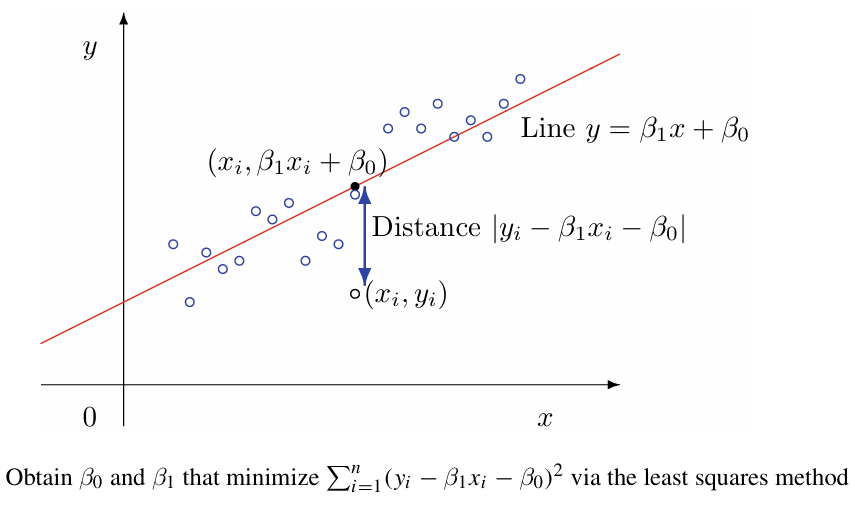

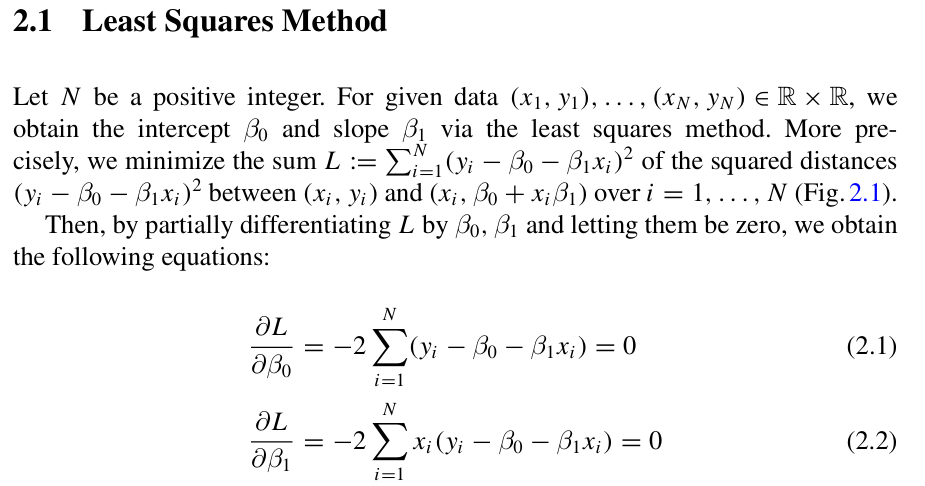

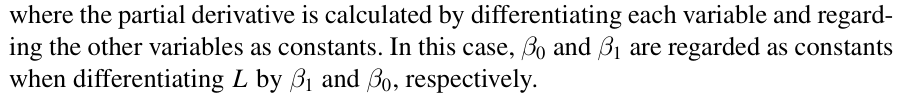

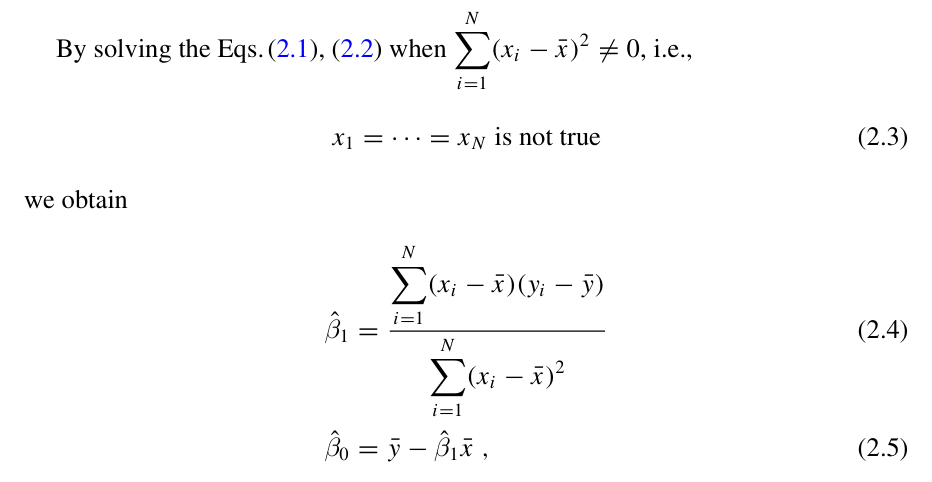

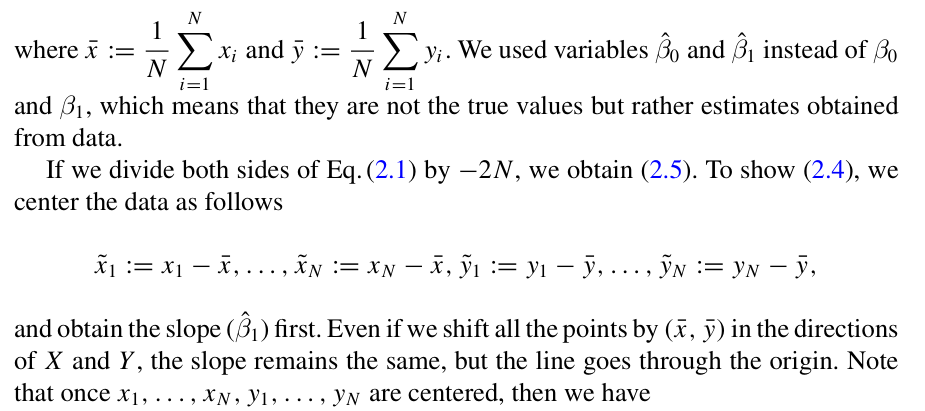

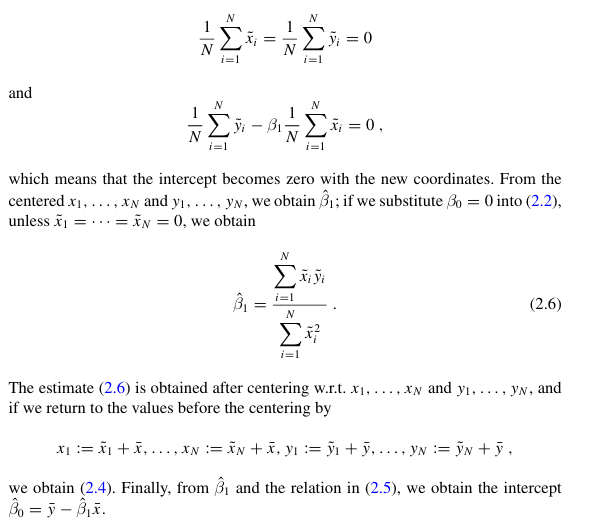

## Example 19 Figure2.2 shows the two lines l and l' generated via the R program below. l is obtained from the N pairs of data and the least squares method, and l' obtained by shifting l so that it goes through the origin.



```
 min.sq=function(x,y){
      # min.sq, a function obtaining intercept and slope via least squares
      x.bar=mean(x);
      y.bar=mean(y)
      beta.1=sum((x-x.bar)*(y-y.bar))/sum((x-x.bar)^2); beta.0=y.bar-beta.1*x.bar
      return (list(a=beta.0, b=beta.1))
 }

 a=rnorm(1);
 b=rnorm(1); # randomly generate the coefficients of the line
 N=100;
 x=rnorm(N);
 y=a*x+b+rnorm(N) # randomly generate the points surrounding the line
 plot(x,y);
 abline(h=0);
 abline(v=0) # plots of the points
 abline(min.sq(x,y)$a, min.sq(x,y)$b,col="red") # the line before centering
 x=x-mean(x); y=y-mean(y) # centering
 abline(min.sq(x,y)$a,min.sq(x,y)$b,col="blue") # the line after centering
 legend("topleft",c("BEFORE","AFTER"),lty=1, col=c("red","blue")) #legend
```

Los residuos desempeñan un papel fundamental en la deducción de los mínimos cuadrados en la regresión lineal simple. Aquí hay una breve explicación de su importancia:

En el contexto de la regresión lineal, los residuos representan las diferencias entre los valores observados y los valores predichos por el modelo. La idea central de los mínimos cuadrados es minimizar la suma de los cuadrados de estos residuos. Esto se hace para encontrar la línea de regresión que mejor se ajusta a los datos, es decir, aquella que minimiza la discrepancia entre los valores observados y los predichos.

Al minimizar la suma de los cuadrados de los residuos, se busca encontrar los coeficientes de la ecuación de regresión que optimizan la precisión del modelo. Es decir, se trata de encontrar la línea que reduce al máximo las diferencias entre los datos reales y las predicciones del modelo.

En resumen, los residuos son esenciales en la deducción de los mínimos cuadrados porque reflejan la calidad del ajuste del modelo a los datos observados, y minimizar la suma de los cuadrados de estos residuos proporciona una forma efectiva de encontrar la mejor línea de regresión.

Se puede utilizar la función `lm` para ajustar una línea de regresión y calcular los residuos en R:

```R
# Generar datos de ejemplo
set.seed(123)
x <- rnorm(100)
y <- 2 * x + rnorm(100)

# Ajustar el modelo lineal
modelo <- lm(y ~ x)

# Obtener las predicciones del modelo
y_estimado <- predict(modelo)

# Calcular los residuos
residuos <- y - y_estimado

# Crear el gráfico de dispersión con la línea de ajuste
plot(x, y, main = "Gráfico de Dispersión con Recta de Ajuste y Residuos",
     xlab = "Variable Independiente", ylab = "Variable Dependiente")
abline(modelo, col = "red")  # Agregar la línea de ajuste en rojo

# Dibujar líneas que representan los residuos
segments(x, y, x, y_estimado, col = "blue")

# Añadir etiquetas
legend("topright", legend = c("Datos", "Recta de Ajuste", "Residuos"),
       col = c("black", "red", "blue"), pch = 1)

```

Este código generará un gráfico de dispersión con la línea de ajuste y líneas que conectan cada punto con la línea de ajuste, representando así los residuos.

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R


## **[Los Precios de las Casas de Boston](https://docs.google.com/document/d/1Fud5Hx_dWhvpDo0Diw59rtpKDKCqvP7l/edit?usp=sharing&ouid=115090580121117021820&rtpof=true&sd=true)**

Las características son:
1. crim: Índice de criminalidad per capita.
2. zn: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
3. indus: Proporción de superficie de negocio no minorista.
4. chas: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso).
5. nox: Concentración de óxidos de nitrógeno (partes por 10 millones).
6. **rm**: Número promedio de habitaciones por vivienda.
7. age: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940.
8. dis: Distancias ponderadas a cinco centros de empleo de Boston.
9. rad: Índice de accesibilidad a las autopistas radiales.
10. tax: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
11. ptratio: Ratio de alumnos por profesor.
12. black: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana.
13. lstat: Porcentaje de población de “estatus de bajo nivel”.
14. **medv**: Mediana del valor de viviendas en propiedad (en miles de dólares).

**Ejercicio:** Realice una Regresión Lineal simple entre las variables
+ x = **RM**: Número promedio de habitaciones por vivienda; y
+ **medv**: Mediana del valor de viviendas en propiedad (en miles de dólares).

```r
library(MASS)
data(Boston)
attach(Boston)
names(Boston)
```
 [1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"  

```r
# Regresión lineal simple entre
# RM: Número promedio de habitaciones por vivienda; y
# medv: Mediana del valor de viviendas en propiedad
# (en miles de dólares)
modelo <- lm(medv~rm)
summary(modelo)
```

---
**SUGERENCIA**: Utilice IA para interpretar la salida de la regresión lineal, explicándole el contexto completo de la situación
---





#### **3.1. Inferencia mediante regresión lineal. Significancia e intervalo de confianza para $\beta_0$ y $\beta_1$**

En la mayoría de casos, aunque el estudio de regresión se aplica a una muestra, el objetivo último es obtener un modelo lineal que explique la relación entre las dos variables en toda la población. Esto significa que el modelo generado es una estimación de la relación poblacional a partir de la relación que se observa en la muestra y, por lo tanto, está sujeta a variaciones. Para cada uno de los parámetros de la ecuación de regresión lineal simple ($\beta_0$ y $\beta_1$) se puede calcular su significancia (p-value) y su intervalo de confianza. El test estadístico más empleado es el **t-test** (existen alternativas no paramétricas).

El test de significancia para la pendiente ($\beta_1$) del modelo lineal considera como hipótesis:

1. $𝐻_0$: No hay relación lineal entre ambas variables por lo que la pendiente del modelo lineal es cero. $\beta_1 = 0$
2. $𝐻_𝑎$: Sí hay relación lineal entre ambas variables por lo que la pendiente del modelo lineal es distinta de cero. $\beta_1 ≠ 0$

De esta misma forma también se aplica a (𝛽0)

#### **Enfoque Matricial de la Regresión Lineal Múltiple**

[Fórmulas para Regresión Lineal Múltiple en Excel](https://docs.google.com/spreadsheets/d/1I6ViVdOhQbIki70Gm1DzxFgzoA5m3t6h/edit?usp=sharing&ouid=115090580121117021820&rtpof=true&sd=true)

Es más cómodo manejar modelos de regresión múltiple cuando se expresan en notación matricial. Eso permite presentar en forma muy compacta al modelo, los datos y los resultados. En notación matricial el modelo de Regresión Lineal Múltiple se puede expresar:

$$
y = X\beta + \epsilon
$$

En general, $y$ es un vector de $n X 1$ de las observaciones, $X$ es una matriz de n X p de los
niveles de las variables regresoras, $\beta$ es un vector de $p X 1$ de los coeficientes de regre-
sión y $\epsilon$ es un vector de $n X 1$ de errores aleatorios.

Se desea determinar el vector $\hat\beta$ de estimadores de mínimos cuadrados, el cual se puede simplificar como:

$$
X^TX\hat\beta = X^Ty
$$

La ecuación anterior, junto con las empleadas para su simplificación, son llamadas las **ecuaciones normales de mínimos cuadrados**. Son la forma matricial de la presentación escalar.

Para resolver las ecuaciones normales se multiplican ambos lados por la inversa de $X^TX$. Así, el estimador de \beta por mínimos cuadrados es:

$$
\hat\beta = (X^TX)^{-1}X^Ty
$$

#### **3.2. Cálculo del estadístico T y del p-value:**

$$
t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}; t = \frac{\hat{\beta_0}-0}{SE(\hat{\beta_0})}
$$

El error estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ se calcula con las siguientes ecuaciones:

$$
SE(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2}]
$$

$$
SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i-\bar{x})^2}
$$

La varianza del error $\sigma^2$ se estima a partir del Residual Standar Error (RSE), que puede entenderse como la diferencia promedio que se desvía la variable respuesta de la verdadera línea de regresión. En el caso de regresión lineal simple, RSE equivale a:

$$
RSE = \sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum_{i=1}^{n}(y_i-\hat{y})}
$$

+ Grados de libertad (df) = número observaciones - 2 = número observaciones - número predictores - 1
+ p-value = P(|t| > valor calculado de t)

#### **3.3. Intervalos de confianza**

$$
\hat{\beta_0} \pm t_{df}^{a/2} SE(\hat{\beta_0})
$$

$$
\hat{\beta_1} \pm t_{df}^{a/2} SE(\hat{\beta_1})
$$

Cuanto menor es el número de observaciones 𝑛, menor la capacidad para calcular el error estándar del modelo. Como consecuencia, la exactitud de los coeficientes de regresión estimados se reduce. Esto tiene importancia sobretodo en la regresión múltiple.

En R, cuando se genera el modelo de regresión lineal, se devuelve junto con el valor de la pendiente y la ordenada en el origen el valor del estadístico 𝑡 obtenido para cada uno y los p-value correspondientes. Esto permite saber, además de la estimación de 𝛽0 y 𝛽1 , si son significativamente distintos de 0. Si se desea conocer los intervalos de confianza para cada uno de los parámetros se pueden calcular con la función **conint()**.

#### **3.4. Residuos del modelo**

[Fórmulas para Regresión Lineal Múltiple en Excel](https://docs.google.com/spreadsheets/d/1I6ViVdOhQbIki70Gm1DzxFgzoA5m3t6h/edit?usp=sharing&ouid=115090580121117021820&rtpof=true&sd=true)

El residuo de una estimación se define como la diferencia entre el valor observado y el valor esperado acorde al modelo. A la hora de sumarizar el conjunto de residuos hay dos posibilidades:

1. El sumatorio del valor absoluto de cada residuo.
2. El sumatorio del cuadrado de cada residuo (RSS). Esta es la aproximación más empleada (mínimos cuadrados) ya que magnifica las desviaciones más extremas. En R, cuando se genera un modelo los residuos también se calculan automáticamente y se almacenados dentro del modelo.

Cuanto mayor es el sumatorio del cuadrado de los residuos menor la precisión con la que el modelo puede predecir el valor de la variable dependiente a partir de la variable predictora. Los residuos son muy importantes puesto que en ellos se basan las diferentes medidas de la bondad de ajuste del modelo.

#### **3.5. Bondad de ajuste del modelo**

Una vez que se ha ajustado un modelo es necesario verificar su eficiencia, ya que aun siendo la línea que mejor se ajusta a las observaciones de entre todas las posibles, el modelo puede ser malo. Las medidas más utilizadas para medir la calidad del ajuste son: **error estándar de los residuos**, **el test F** y el **coeficiente de determinación $R^2$**.

**Error estándar de los residuos (Residual Standar Error, RSE)**:

Mide la desviación promedio de cualquier punto estimado por el modelo respecto de la verdadera recta de regresión poblacional. Tiene las mismas unidades que la variable dependiente 𝑌. Una forma de saber si el valor del RSE es grande consiste en dividirlo entre el valor medio de la variable respuesta, obteniendo así un % de la desviación.

$$
RSE = \sqrt{\frac{1}{n-p-1}RSS}
$$

En modelos lineales simples, dado que hay un único predictor
$(𝑛 − 𝑝 − 1) = (𝑛 − 2)$

Donde RSS, es el sumatorio del cuadrado de cada residuo (RSS)
$RSS=\sum_{i=1}^{n}(\hat{y_i}-y_i)$

La suma de cuadrados de los residuos (SCE) representa con una cifra lo que un modelo no es capaz de explicar.

**Coeficiente de determinación R2**:

Describe la proporción de variabilidad observada en la variable dependiente Y explicada por el modelo y relativa a la variabilidad total. Su valor está acotado entre 0 y 1. Al ser adimensional presenta la ventaja frente al RSE de ser más fácil de interpretar.

$$
R^2 = \frac{𝑆𝑢𝑚𝑎 \space 𝑑𝑒 \space 𝑐𝑢𝑎𝑑𝑟𝑎𝑑𝑜𝑠 \space 𝑡𝑜𝑡𝑎𝑙𝑒𝑠 − 𝑆𝑢𝑚𝑎 \space 𝑑𝑒 \space 𝑐𝑢𝑎𝑑𝑟𝑎𝑑𝑜𝑠 \space 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙𝑒𝑠}{𝑆𝑢𝑚𝑎 \space 𝑑𝑒 \space 𝑐𝑢𝑎𝑑𝑟𝑎𝑑𝑜𝑠 \space 𝑡𝑜𝑡𝑎𝑙𝑒𝑠}
$$

$$
R^2 = 1- \frac{𝑆𝑢𝑚𝑎 \space 𝑑𝑒 \space 𝑐𝑢𝑎𝑑𝑟𝑎𝑑𝑜𝑠 \space 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙𝑒𝑠}{𝑆𝑢𝑚𝑎 \space 𝑑𝑒 \space 𝑐𝑢𝑎𝑑𝑟𝑎𝑑𝑜𝑠 \space 𝑡𝑜𝑡𝑎𝑙𝑒𝑠}
$$

$$
R^2 = 1- \frac{\sum_{i=1}^{n}(\hat{y_i}-y_i)}{\sum_{i=1}^{n}(y_i-\bar{y})}
$$

En los modelos de regresión lineal simple el valor de 𝑅2 se corresponde con el cuadrado del coeficiente de correlación de Pearson (r) entre X e Y, no siendo así en regresión múltiple. Existe una modificación de 𝑅2 conocida como [𝑅2 − a𝑗𝑢𝑠𝑡𝑎𝑑𝑜](https://economipedia.com/definiciones/r-cuadrado-ajustado-coeficiente-de-determinacion-ajustado.html#:~:text=El%20R%20cuadrado%20ajustado%20(o,en%20explicar%20la%20variable%20dependiente.) que se emplea principalmente en los modelos de regresión múltiple. Introduce una penalización cuantos más predictores se incorporan al modelo. En los modelos lineales simples no se emplea.

**Test F**:

El test F es un test de hipótesis que considera como hipótesis nula que todos los coeficientes de correlación estimados son cero, frente a la hipótesis alternativa de que al menos uno de ellos no lo es. Se emplea en modelos de regresión múltiple para saber si al menos alguno de los predictores introducidos en el modelo contribuye de forma significativa. En modelos lineales simples, dado que solo hay un predictor, el p-value del test F es igual al p-value del t-test del predictor.

#### **3.6. Condiciones para la regresión lineal**

1. Linealidad: La relación entre ambas variables debe ser lineal. Para comprobarlo se puede recurrir a:
    + Graficar ambas variables a la vez (scatterplot o diagrama de dispersión), superponiendo la recta del modelo generado por regresión lineal.
    + Calcular los residuos para cada observación acorde al modelo generado y graficarlos (scatterplot). Deben distribuirse de forma aleatoria en torno al valor 0.
2. **Distribución Normal de los residuos**: Los residuos se tiene que distribuir de forma normal, con media igual a 0. Esto se puede comprobar con un histograma, con la distribución de cuantiles (qqnorm() + qqline()) o con un test de hipótesis de normalidad. Los valores extremos suelen ser una causa frecuente por la que se viola la condición de normalidad.
3. **Varianza de residuos constante (homocedasticidad)**: La varianza de los residuos ha de ser aproximadamente constante a lo largo del eje 𝑋. Se puede comprobar mediante gráficos (scatterplot) de los residuos de cada observación (formas cónicas son un claro indicio de falta de homocedasticidad) o mediante contraste de hipótesis mediante el test de [Test de Breusch-Pagan](https://es.wikipedia.org/wiki/Test_de_Breusch-Pagan). Puedes consultar también para ampliar conceptos, en: **[PRUEBAS DE HETEROCEDASTICIDAD Y HOMOCEDASTICIDAD](https://rpubs.com/Carlos_Martinez/505361)**.

4. **Valores atípicos y de alta influencia**: Hay que estudiar con detenimiento los valores atípicos o extremos ya que pueden generar una falsa correlación que realmente no existe, u ocultar una existente. (Ver descripción detallada en la sección de apuntes varios).

5. **Independencia, Autocorrelación**: Las observaciones deben ser independientes unas de otras. Esto es importante tenerlo en cuenta cuando se trata de mediciones temporales. Puede detectarse estudiando si los residuos siguen un patrón o tendencia. Otro caso frecuente es el de tener varias mediciones para un mismo sujeto. En estos casos, primero se obtiene la media de cada uno y después se ajusta el modelo empleando las medias.

Dado que las condiciones se verifican a partir de los residuos, primero se suele generar el modelo y después se valida. De hecho, el ajuste de un modelo debe verse como un proceso iterativo en el que se ajusta un modelo inicial, se evalúa mediante sus residuos y se mejora. Así hasta llegar a un modelo óptimo.

In [2]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
ans = sns.load_dataset("anscombe")
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


# **4. ALGORITMOS DE REGRESIÓN MAS COMUNES**

#### **4.1. Regresión Lineal Simple**



In [ ]:
from sklearn import datasets, linear_model

In [ ]:
boston = datasets.load_boston()
boston.keys()

In [ ]:
print(boston.feature_names)

In [ ]:
boston.target

In [ ]:
# seleccionar la quinta columna
import numpy as np
x = boston.data[:,np.newaxis, 5]
y = boston.target
X,y

In [ ]:
# Separar en dos muestras de train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# defino el algoritmo
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
# Entreno el modelo
lr.fit(x_train,y_train)
# Hago una predicción con x_test
y_pred = lr.predict(x_test)
y_pred

In [ ]:
# Los coeficientes
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
# Precisión del modelo R2
lr.score(x_train,y_train)

#### Regresión lineal con statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
x

In [ ]:
# Especifico la constante del modelo agregar un vector de unos a X
x2 = sm.add_constant(x)
x2

In [ ]:
# Ajusto el modelo
modelo = sm.OLS(y,x2)
resultados = modelo.fit()
print(resultados.summary())

In [ ]:
# Modelación sin la constante
# Ajusto el modelo
modelo = sm.OLS(y,x)
resultados = modelo.fit()
print(resultados.summary())

In [ ]:
resultados.

#### **4.2. Regresión Lineal Múltiple**

In [ ]:
boston = datasets.load_boston()
boston.data.shape

In [ ]:
boston.feature_names

In [ ]:
# Obtengo matriz X y y
x_multiple = boston.data[:,5:8]
y_multiple = boston.target

In [ ]:
# Separo train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_multiple,y_multiple,test_size=0.2)

In [ ]:
# efino el algoritmo a utilizar
from sklearn import linear_model
lr_multiple = linear_model.LinearRegression()

In [ ]:
# Entreno el modelo
lr_multiple.fit(x_train,y_train)
# Realizo una predicción
y_pred = lr_multiple.predict(x_test)

In [ ]:
lr_multiple.score(x_train,y_train)

# Regresión lineal multiple con statsmodels

In [ ]:
x_multiple,y_multiple

In [ ]:
import statsmodels.api as sm
x_multiple2 = sm.add_constant(x_multiple)
x_multiple, x_multiple2

In [ ]:
boston.feature_names

In [ ]:
#defino el modelo con la constante
modelo = sm.OLS(y_multiple,x_multiple2)
resultados = modelo.fit()
print(resultados.summary())

In [ ]:
#defino el modelo sin la constante
modelo = sm.OLS(y_multiple,x_multiple)
resultados = modelo.fit()
print(resultados.summary())

#### **4.3. MÉTODO DE MODELACIÓN CON ELIMINACIÓN HACIA ATRÁS CON R**

**Para realizar en kaggle.**

1. Cargue el archivo agregados:
2. Invoque la librería MASS con la siguiente orden:
```
library(MASS)
# llama la librería MASS que contiene la función **stepAIC**
```


3. Genere una regresión lineal múltiple con la variable rcompc (Resistencia a la compresión del concreto), en función de todas las demás variables numéricas, con la siguiente orden:

```
r1=lm(rcompc~.,data=a)
#creando el objeto que contiene la regresión multivariada
```

Observe todos los detalles de la modelación con la siguiente orden:
```
summary(r1)
```

En el listado anterior, observe los valores de las probabilidades de cada uno de los coeficientes estimados, aquellos valores mayores de 0.05 significa que deben salir del modelo. Puede seguir el procedimiento indicado en el taller de regresión lineal múltiple.

5. Puede realizar la modelación con eliminación hacia atrás, con la siguiente orden:
```
r2=stepAIC(r1, k=log(length(a)) )
```

Es importante usar **$k=log(length(a))$** este nos brinda una salida detallada de todos los pasos del proceso de modelación. Observe que se incluye dentro del paréntesis el valor de la matriz “a”

**AIC. Es el Criterio de la información de Akaike**.

Akaike's information criterion, developed by Hirotsugu Akaike under the name of "an information criterion" (AIC) in 1971 and proposed in Akaike (1974), is a measure of the goodness of fit of an estimated statistical model. It is grounded in the concept of entropy, in effect offering a relative measure of the information lost when a given model is used to describe reality and can be said to describe the tradeoff between bias and variance in model construction, or loosely speaking that of precision and complexity of the model.
The AIC is not a test on the model in the sense of hypothesis testing, rather it is a tool for Model selection. Given a data set, several competing models may be ranked according to their AIC, with the one having the lowest AIC being the best. From the AIC value one may infer that e.g the top three models are in a tie and the rest are far worse, but one should not assign a value above which a given model is 'rejected'.

#### **4.4. Regresión Polinomial**

In [ ]:
from sklearn import datasets, linear_model

boston= datasets.load_boston()

In [ ]:
#Seleccionamos solamente la columna 6 del dataset
X_p = boston.data[:, np.newaxis, 5]
y_p = boston.target

In [ ]:
from sklearn.model_selection import train_test_split

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

In [ ]:
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

In [ ]:
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

In [ ]:
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

In [ ]:
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

In [ ]:
# Valor de la pendiente o coeficiente "a":
pr.coef_
# Valor de la intersección o coeficiente "b":
pr.intercept_

In [ ]:
# Precisión del modelo:
pr.score(X_train_poli, y_train_p)

#### **4.5. Regresión Logística**



In [ ]:
#Se importan la librerías a utilizar
from sklearn import datasets
#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()
dataset.keys()

In [ ]:
#Seleccionamos todas las columnas
X = dataset.data

In [ ]:
#Defino los datos correspondientes a las etiquetas
y = dataset.target

In [ ]:
########## IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ##########
from sklearn.model_selection import train_test_split

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression

algoritmo = LogisticRegression()

In [ ]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

In [ ]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)

matriz

In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)

exactitud

In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
sensibilidad

In [ ]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
puntajef1

In [ ]:
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

#### **4.6. [Regresiòn Robusta: todo lo que necesita saber y un ejemplo en Python](https://ichi.pro/es/regresion-robusta-todo-lo-que-necesita-saber-y-un-ejemplo-en-python-9311625129920)**



[Robusta regresión para el aprendizaje de la máquina en Python](https://topbigdata.es/robusta-regresion-para-el-aprendizaje-de-la-maquina-en-python/)

#### **4.7. Regresión Robusta con statsmodels**

#### **[Modelos lineales robustos con statsmodels](https://www.statsmodels.org/stable/rlm.html)**

Modelos lineales robustos con soporte para los estimadores M enumerados en [Normas](https://www.statsmodels.org/stable/rlm.html#norms).

Consulte [Referencia del módulo](https://www.statsmodels.org/stable/rlm.html#module-reference) para ver comandos y argumentos.

Ejemplos:

In [ ]:
import statsmodels.api as sm

# Load modules and data
data = sm.datasets.stackloss.load(as_pandas=False)
data.exog = sm.add_constant(data.exog)

In [ ]:
# Fit model and print summary
rlm_model = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()

In [ ]:
rlm_results.params

In [ ]:
rlm_results.summary()

#### **Se pueden encontrar ejemplos detallados aquí:**

1. [Modelos robustos 1](https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html)

2. [Modelos robustos 2](https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_1.html)



#### **Documentación técnica**

**[Funciones de peso](https://www.statsmodels.org/stable/rlm_techn1.html)**

**Referencias**

PJ Huber. 'Estadísticas sólidas' John Wiley and Sons, Inc., Nueva York. 1981.

PJ Huber. 1973, 'Las conferencias en memoria de Wald de 1972: regresión robusta: asintóticas, conjeturas y Montecarlo'. The Annals of Statistics, 1.5, 799-821.

R Venables, B Ripley. 'Estadísticas aplicadas modernas en S' Springer, Nueva York,

C Croux, PJ Rousseeuw, 'Algoritmos eficientes en el tiempo para dos estimadores de escala altamente robustos' Estadística computacional. Physica, Heidelberg, 1992.

#### **4.8. [Regresión lineal con statsmodels](https://www.statsmodels.org/stable/regression.html) y sus Diagnósticos de regresión con statsmodels**

Modelos lineales con errores distribuidos de forma independiente e idéntica, y para errores con heterocedasticidad o autocorrelación. Este módulo permite la estimación por mínimos cuadrados ordinarios (OLS), mínimos cuadrados ponderados (WLS), mínimos cuadrados generalizados (GLS) y mínimos cuadrados generalizados factibles con errores AR (p) autocorrelacionados.

Consulte [Referencia del módulo](https://www.statsmodels.org/stable/regression.html#module-reference) para ver comandos y argumentos.

Ejemplos:

In [ ]:
# Load modules and data
import numpy as np

import statsmodels.api as sm

spector_data = sm.datasets.spector.load(as_pandas=False)

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()

print(res.summary())

##### Estimar un modelo de regresión

In [ ]:
# from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

##### Normalidad de los residuales

Prueba de Jarque-Bera:

In [ ]:
from statsmodels.compat import lzip
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

##### Prueba Omni:

In [ ]:
from statsmodels.compat import lzip
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

##### Pruebas de influencia

Una vez creado, un objeto de clase OLSInfluencecontiene atributos y métodos que permiten a los usuarios evaluar la influencia de cada observación. Por ejemplo, podemos calcular y extraer las primeras filas de DFbetas mediante:

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

##### Explore otras opciones escribiendo **dir(influence_test)**

También se puede trazar información útil sobre el apalancamiento:

In [ ]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

##### Otras opciones de trazado se pueden encontrar en la [página Gráficos](https://www.statsmodels.org/stable/graphics.html).

##### Multicolinealidad

Número de condición:

In [ ]:
np.linalg.cond(results.model.exog)

##### Pruebas de heterocedasticidad¶

**Prueba Breush-Pagan**:

In [ ]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

##### Prueba de Goldfeld-Quandt

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

##### **Linealidad: Harvey-Collier**

Prueba del multiplicador de **Harvey-Collier** para la hipótesis nula de que la especificación lineal es correcta:

In [ ]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

#### **4.9. Regresión no Lineal con curve_fit de scipy**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
def f(x, a, b):
    return a + (0.49 -a)*np.exp(-b*(x-8))


In [ ]:
semanas=[8,8,10,10,10,10,12,12,12,12,14,14,14,16,16,16,18,18,
        20,20,20,22,22,22,24,24,24,26,26,26,28,28,30,30,30,32,
        32,34,36,36,38,38,40,42]

cloro = [0.49,0.49,0.48,0.47,0.48,0.47,0.46,0.46,0.45,0.43,0.45,
        0.43,0.43,0.44,0.43,0.43,0.46,0.45,0.42,0.42,0.43,0.41,
        0.41,0.40,0.42,0.40,0.40,0.41,0.40,0.41,0.41,0.40,0.40,
        0.40,0.38,0.41,0.40,0.40,0.41,0.38,0.40,0.40,0.39,0.39]

In [ ]:
x = semanas
y = cloro

In [ ]:
res,cov = curve_fit(f,x,y)

In [ ]:
print(res)
print(cov)

In [ ]:
xx = np.linspace(8,40,50)
fig,axes=plt.subplots()
axes.scatter(x,y)
axes.plot(xx,f(xx,0.39014001,0.1016327))

# [Pruebas de diagnóstico y especificación de regresión](https://www.statsmodels.org/stable/diagnostic.html)

...**ELABORAR CUADERNO**...

#### **Se pueden encontrar ejemplos detallados aquí:**

## ***SE PUEDEN HACER NOTEBOOKS DE CADA UNO***


1. [OLS](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)

2. [WLS](https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html)

3. [GLS](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html)

4. [LS recursivo](https://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html)

5. [Rolling LS](https://www.statsmodels.org/stable/examples/notebooks/generated/rolling_ls.html)

**[Documentación técnica](https://www.statsmodels.org/stable/regression.html)**